In [ ]:
!pip install pytesseract
!pip install matplotlib

In [ ]:
print("My self Atul")

My self Atul


In [ ]:
import cv2
cap=cv2.VideoCapture(0)

In [ ]:
!pip install opencv-python
!pip install tensorflow
!pip install numpy

In [ ]:
import cv2
from tensorflow.keras.models import load_model
import numpy as np


def preprocessing(input_image, edge=False, inv_thresh=False):
    gray_img = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    gray_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
    if inv_thresh:
        ret, im_th = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        im_th = cv2.adaptiveThreshold(im_th, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 75, 10)
        im_th = cv2.bitwise_not(im_th)
    else:
        ret, im_th = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        im_th = cv2.adaptiveThreshold(im_th, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 75, 10)
    if edge:
        edge_image = cv2.Canny(im_th, 0, 255)
        return edge_image
    return im_th


CATEGORIES = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

img = cv2.imread(r'/content/Images/test1.jpg')
# cv2.imshow("img", img)
# cv2.waitKey(0)
edged = preprocessing(img, edge=True, inv_thresh=True)
# cv2.imshow('edged', edged)
# cv2.waitKey(0)

contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# rects = [np.int0(cv2.boxPoints(cv2.minAreaRect(cnt))) for cnt in contours]
rects = [cv2.boundingRect(ctr) for ctr in contours]
# [print(index, rect) for index, rect in enumerate(rects)]
# print(len(rects))
result = ''
print(result)
model = load_model('weights.h5')
for index, rect in enumerate(rects):
    # cv2.rectangle(img, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 0, 0), 1)
    # length = int(rect[3] * 1.6)
    # pt1 = int(rect[1] + rect[3] // 2 - length // 2)
    # pt2 = int(rect[0] + rect[2] // 2 - length // 2)
    # roi = img[pt1:pt1 + length, pt2:pt2 + length]
    roi = img[rect[1]:rect[1] + rect[3], rect[0]:rect[0] + rect[2]]
    roi = preprocessing(roi)
    # cv2.imshow('ROI', roi)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    # print(index)

    # cv2.imwrite(f'.\\ROI\\{index}.jpg', roi)

    image = cv2.resize(roi, (28, 28))
    image = image.reshape(-1, 28, 28, 1).astype(float)
    prediction = np.argmax(model.predict(image), axis=-1)
    cv2.putText(img, CATEGORIES[prediction[0]], (rect[0], rect[1]), cv2.FONT_HERSHEY_PLAIN, 3, (0, 0, 0), 2)
    result += CATEGORIES[prediction[0]]

# cv2.imshow('contours', img)
# cv2.waitKey(0)
cv2.imwrite('/content/Images/contoured1.jpg', img)
# print(result)

OSError: ignored

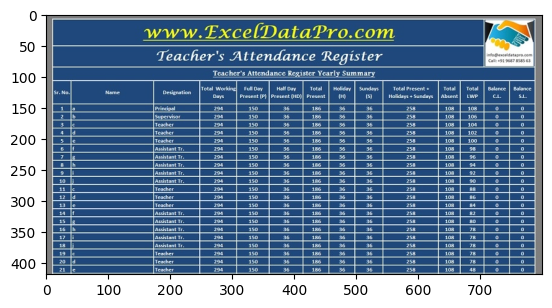

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/sample_data/Images/demo.jpg')
imgplot = plt.imshow(img)

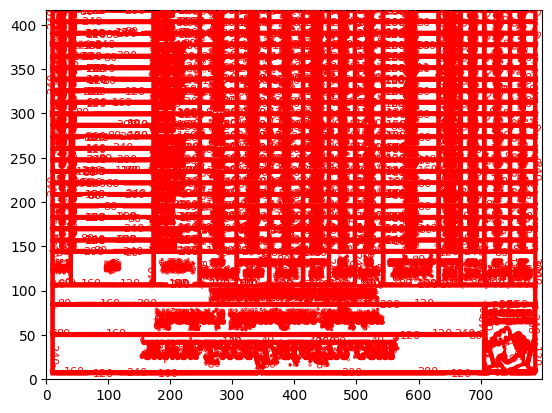

In [ ]:
contours = plt.contour(gray_img, colors='r', linewidths=2)
plt.clabel(contours, inline=True, fontsize=8)
plt.show()

In [ ]:
import numpy as np
import pytesseract
!pip install pytesseract
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev
from PIL import Image


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,629 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
gray_img = np.mean(img, axis=2)

In [ ]:
plt.imshow(gray_img)

In [ ]:
x_start,x_end,y_start,y_end=map(int,input().split())

0 40 150 155


In [ ]:
x_start,x_end,y_start,y_end=10,40,148,157

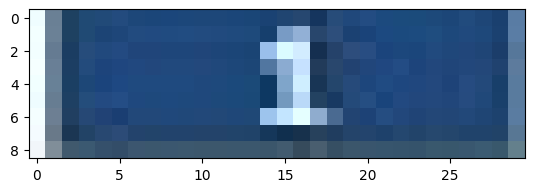

In [ ]:
roi = img[y_start:y_end, x_start:x_end]
imgplot = plt.imshow(roi)

In [ ]:
text = pytesseract.image_to_string(img[148:197, 10:40])

In [ ]:
print(text)

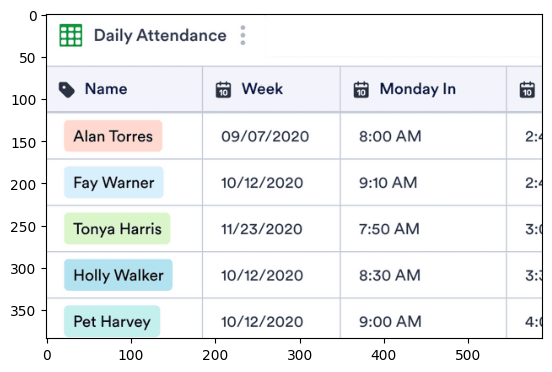

In [ ]:
img = Image.open('/content/sample_data/Images/demo2.png')
plt.imshow(img)

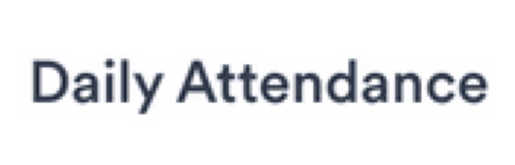

In [ ]:
roi = img.crop((50,0,220,50))
plt.imshow(roi)
plt.axis('off')
plt.show()

In [ ]:
text = pytesseract.image_to_string(roi)

In [ ]:
print(text)

Daily Attendance



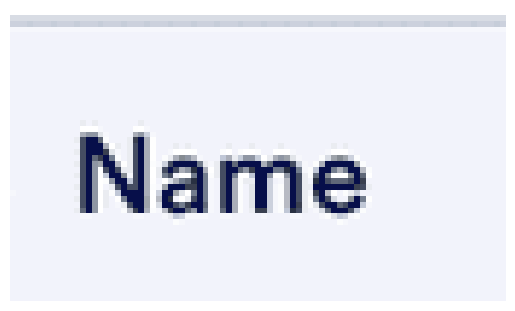

In [ ]:
roi = img.crop((35,60,120,110))
plt.imshow(roi)
plt.axis('off')
plt.show()

In [ ]:
text = pytesseract.image_to_string(roi)

In [ ]:
print(text)

Name



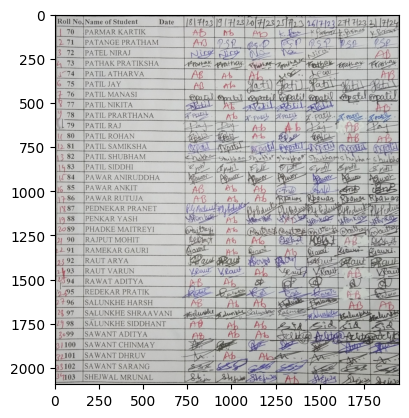

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv

img = Image.open('/content/sample_data/Images/demo5.jpg')
plt.imshow(img)

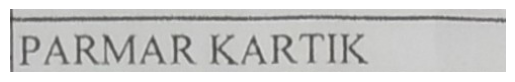

In [ ]:
roi = img.crop((160,62,650,62*2))
plt.imshow(roi)
plt.axis('off')
plt.show()

In [ ]:
text = pytesseract.image_to_string(roi)
print(text)


PARMAR KARTIK



In [ ]:
data_to_insert = [
    ["Name"],
    ["John"],
    ["Alice"],
]
for n in range(1,20):
  img = Image.open('/content/sample_data/Images/demo5.jpg')
  roi = img.crop((160,65+n*62,650,127+n*62))
  text = pytesseract.image_to_string(roi)
  text=text.split("\n")
  for i in text:
    if len(i)>4:
      data_to_insert.append([(i)])
      break


In [ ]:
for name in text:
  if len(name)>4:
    break;

In [ ]:
print(data_to_insert)

[['Name'], ['John'], ['Alice'], ['IPATANGE PRATHAM'], ['[PATEL NIRAJ'], ['PATHAK PRATIKSHA'], ['PATIL ATHARVA'], ['PATIL JAY'], ['PATIL MANASI'], ['PA TIL NEE'], ['FALIL NA'], ['a 11L KAJ'], ['FATIL RUMAIN'], ['—— Ally OFMIVILINOTITSY'], ['A SRA REY IAEA AVE'], ['ee A Bad RA tS AE'], ['PAWAR ANKIT'], ['PAWAR RUTUJA'], ['IPEDNEKAR PRANET'], ['IPENKAR YASH'], ['IPHADKE MAITREY]'], ['RAJPUT MOHIT']]


In [ ]:
text=text.split("\n")

In [ ]:
data_to_insert.append([(name)])
print(data_to_insert)

[['Name'], ['John'], ['Alice'], ['IPATANGE PRATHAM'], ['[PATEL NIRAJ'], ['PATHAK PRATIKSHA'], ['PATIL ATHARVA'], ['PATIL JAY'], ['PATIL MANASI'], ['PA TIL NEE'], ['FALIL NA'], ['a 11L KAJ'], ['FATIL RUMAIN'], ['—— Ally OFMIVILINOTITSY'], ['A SRA REY IAEA AVE'], ['ee A Bad RA tS AE'], ['PAWAR ANKIT'], ['PAWAR RUTUJA'], ['IPEDNEKAR PRANET'], ['IPENKAR YASH'], ['IPHADKE MAITREY]'], ['RAJPUT MOHIT'], ['DLIANKE MAITREY]']]


In [ ]:
with open(file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    for row in data_to_insert:
        csv_writer.writerow(row)

In [ ]:
file_path = '/content/sample_data/data/attendance.csv'

In [ ]:
import csv

data_to_insert = [
    ["Name"],
    ["John"],
    ["Alice"],
]

with open(file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    for row in data_to_insert:
        csv_writer.writerow(row)


In [ ]:
data_to_insert = [
    [text]
]

with open(file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    for row in data_to_insert:
        csv_writer.writerow(row)

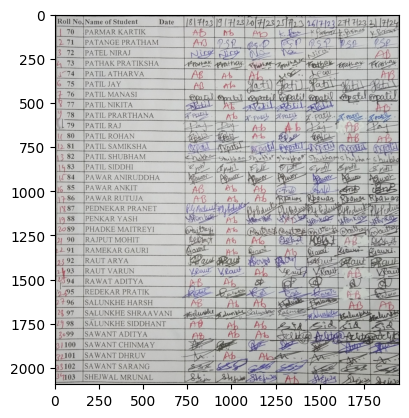

In [ ]:
img = Image.open('/content/sample_data/Images/demo5.jpg')
plt.imshow(img)

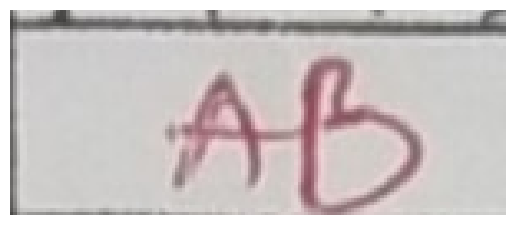

In [ ]:
roi = img.crop((730,68,880,130))
plt.imshow(roi)
plt.axis('off')
plt.show()

In [ ]:
text = pytesseract.image_to_string(roi)
text

'\x0c'

### **Automation with table**

In [ ]:
!pip install tabula
!pip install camelot-py


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.3/276.3 kB 26.5 MB/s eta 0:00:00


In [ ]:
import camelot

In [ ]:
# Specify the path to the image file containing the table
image_path = '/content/sample_data/images/test1.jpg'

# Use camelot to extract tables from the image
tables = camelot.read_pdf(image_path, flavor='image')

# Loop through the detected tables
for table in tables:
    # Process and manipulate the data as needed
    print(table.df)


NotImplementedError: ignored

### **Automation with Ml model**